# 🏥 Medical Cost Prediction

This notebook aims to predict the **medical insurance charges** of individuals based on demographic and lifestyle factors.  

## 📊 Objectives
- Explore how features like **age, BMI, smoking status, and region** affect medical costs.
- Build regression models to predict insurance charges.
- Compare model performances to select the best approach.

## ✅ Steps
1. Data Preprocessing  
2. Exploratory Data Analysis (EDA)  
3. Model Training & Evaluation  
4. Results & Insights

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
sns.set()

In [3]:
medical_data = pd.read_csv('insurance.csv')
medical_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
medical_data.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [5]:
medical_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
medical_data.shape

(1338, 7)

In [7]:
medical_data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
medical_data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<Figure size 800x800 with 0 Axes>

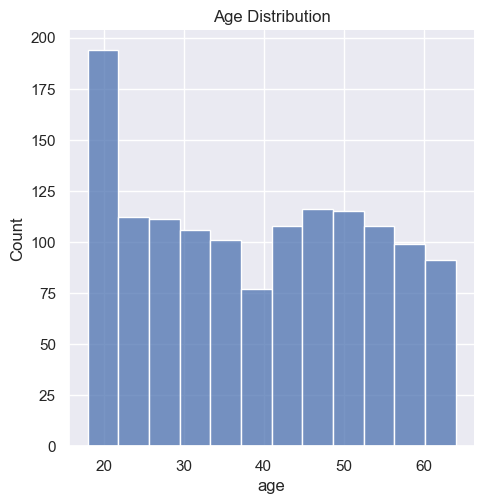

In [9]:
plt.figure(figsize = (8,8))
sns.displot(medical_data['age'])
plt.title('Age Distribution')
plt.show()

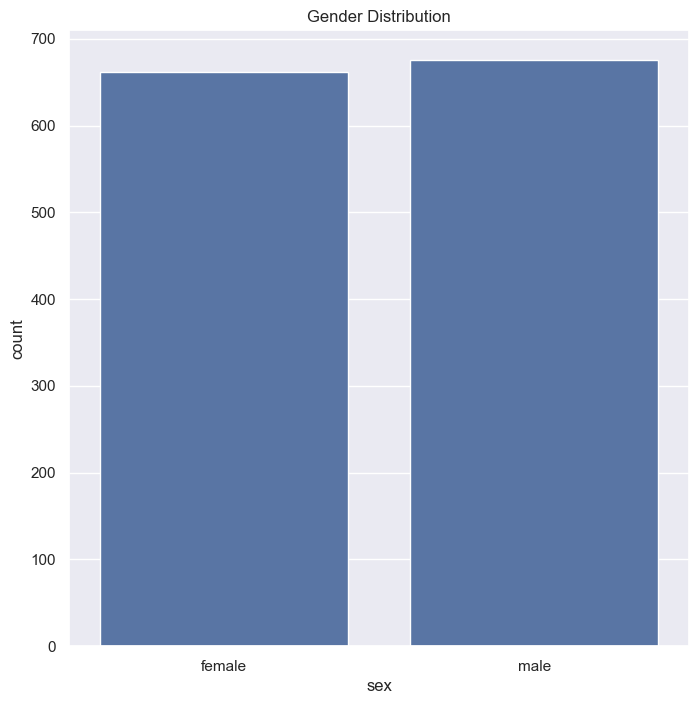

In [10]:
plt.figure(figsize = (8,8))
sns.countplot( x = 'sex', data = medical_data)
plt.title('Gender Distribution')
plt.show()

In [11]:
medical_data['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

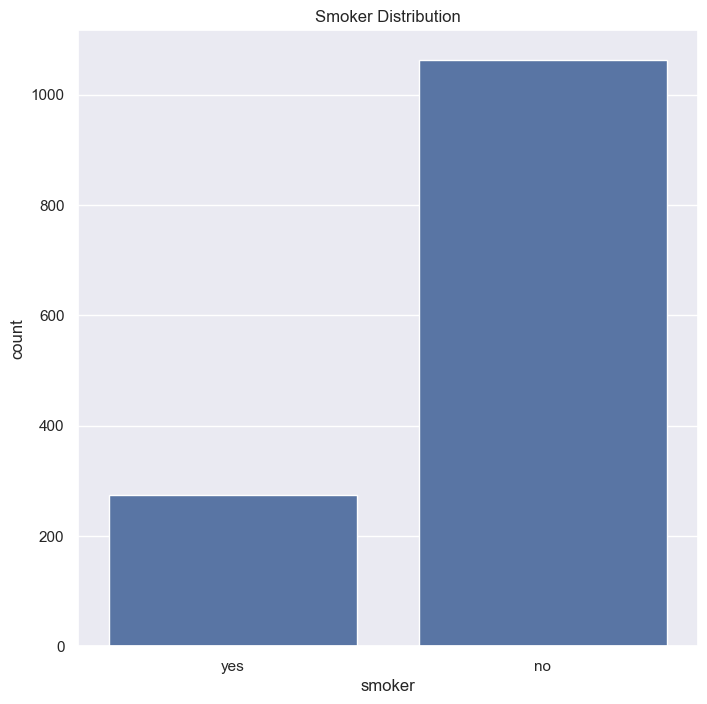

In [12]:
plt.figure(figsize = (8,8))
sns.countplot( x = 'smoker', data = medical_data)
plt.title('Smoker Distribution')
plt.show()

<Figure size 800x800 with 0 Axes>

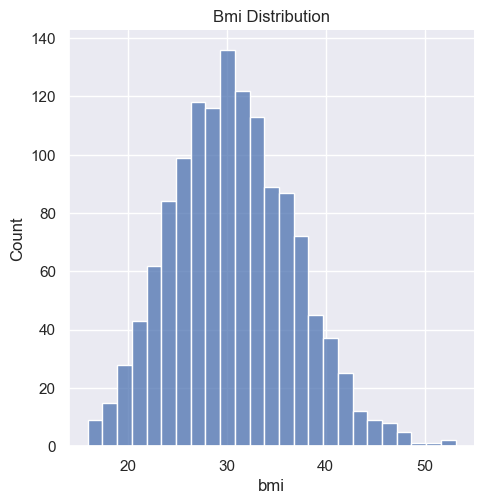

In [13]:
plt.figure(figsize = (8,8))
sns.displot(medical_data['bmi'])
plt.title('Bmi Distribution')
plt.show()

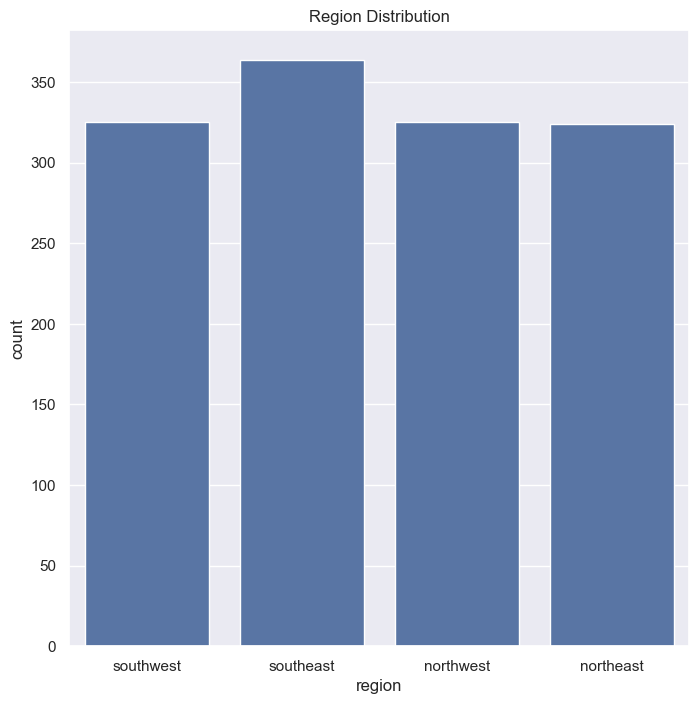

In [14]:
plt.figure(figsize = (8,8))
sns.countplot( x = 'region', data = medical_data)
plt.title('Region Distribution')
plt.show()

In [15]:
medical_data['sex'] = medical_data['sex'].replace({'male': 1, 'female': 0}).astype(int)


C:\Users\vinayak\AppData\Local\Temp\ipykernel_25596\1912638226.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  medical_data['sex'] = medical_data['sex'].replace({'male': 1, 'female': 0}).astype(int)


In [16]:
 medical_data['smoker'] = medical_data['smoker'].replace({'yes':1,'no':0})

C:\Users\vinayak\AppData\Local\Temp\ipykernel_25596\2944040285.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  medical_data['smoker'] = medical_data['smoker'].replace({'yes':1,'no':0})


In [17]:
medical_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [18]:
medical_data['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [19]:
medical_data['region'] = medical_data['region'].map({'southeast':0,'southwest':1,'northwest':2,'northeast':3})

In [20]:
medical_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,1,16884.92400
1,18,1,33.770,1,0,0,1725.55230
2,28,1,33.000,3,0,0,4449.46200
3,33,1,22.705,0,0,2,21984.47061
4,32,1,28.880,0,0,2,3866.85520


In [21]:
new_data = medical_data.copy()

In [22]:
new_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,1,16884.92400
1,18,1,33.770,1,0,0,1725.55230
2,28,1,33.000,3,0,0,4449.46200
3,33,1,22.705,0,0,2,21984.47061
4,32,1,28.880,0,0,2,3866.85520


In [23]:
x = new_data.drop(columns = 'charges',axis = 1)
y = new_data['charges']

In [24]:
print(x)

      age  sex     bmi  children  smoker  region
0      19    0  27.900         0       1       1
1      18    1  33.770         1       0       0
2      28    1  33.000         3       0       0
3      33    1  22.705         0       0       2
4      32    1  28.880         0       0       2
...   ...  ...     ...       ...     ...     ...
1333   50    1  30.970         3       0       2
1334   18    0  31.920         0       0       3
1335   18    0  36.850         0       0       0
1336   21    0  25.800         0       0       1
1337   61    0  29.070         0       1       2

[1338 rows x 6 columns]


In [25]:
print(y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


In [28]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 2)

In [29]:
model = LinearRegression() 
model.fit(x_train,y_train)

LinearRegression()

In [30]:
x_train_prediction = model.predict(x_train)


In [31]:
r_score = metrics.r2_score(x_train_prediction,y_train)

In [32]:
print(r_score)

0.6698935862418944


In [33]:
x_test_prediction = model.predict(x_test)
r2_score = metrics.r2_score(x_test_prediction,y_test)
print(r2_score)

0.6617415261290792


In [36]:

# Example input with 6 features
input_data = (45, 27.5, 120, 200, 1, 0)  # <-- must match training features

# Convert to numpy array
input_data_as_numpy = np.array(input_data)

# Reshape to 2D array (1 row, 6 columns)
input_data_reshaped = input_data_as_numpy.reshape(1, -1)

# Prediction
prediction = model.predict(input_data_reshaped)
print("Prediction:", prediction)


Prediction: [178355.68882242]


C:\Users\vinayak\OneDrive\Documents\anaconda\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
